# Reading & Working with Geometry Files

This notebook demonstrates how to use the `Grid.from_file()` class method to load in geometry files such as:

1. Shapefile
2. GeoJSON
3. Various geometry types (Polygon, LineString, Point, and their Multi-variants)

Highlighted is a workflow showcasing how to remap a variable from an unstructured grid to a Shapefile.

In [1]:
import os
import tempfile
import warnings

import geocat.datafiles as geodf
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import (
    LineString,
    MultiLineString,
    MultiPoint,
    MultiPolygon,
    Point,
    Polygon,
)

import uxarray as ux

warnings.filterwarnings("ignore")

## Load a Polygon Shapefile and Plot  

* This section demonstrates how to load a shapefile containing polygon geometries using uxarray's Grid.from_file() function
* The shapefile used in this example is the US national boundary file from the US Census Bureau. It is a 20m resolution shapefile that represents the national boundary of the United States. 
* The data is plotted using the matplotlib backend.

Transforming CRS from EPSG:4269 to EPSG:4326...
Transformed CRS: EPSG:4326


OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W

:Path   [Longitude,Latitude]
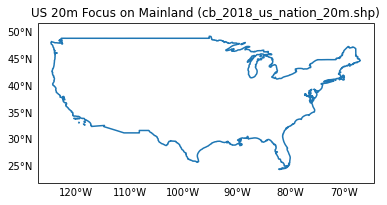

In [2]:
shp_filename = (
    "../../test/meshfiles/shp/cb_2018_us_nation_20m/cb_2018_us_nation_20m.shp"
)
uxds = ux.Grid.from_file(shp_filename)
lat_bounds = [20, 50]  # Latitudes for mainland US
lon_bounds = [-130, -60]  # Longitudes for mainland US
uxds = uxds.subset.bounding_box(lon_bounds, lat_bounds)
uxds.plot(
    title="US 20m Focus on Mainland (cb_2018_us_nation_20m.shp)",
    backend="matplotlib",
    width=500,
)

## Working with Different Geometry Types

UXarray supports various geometry types from shapefiles and GeoJSON files. Let's explore examples of each type:

### LineString Example

LineString geometries represent linear features such as roads, rivers, or paths. When loaded into UXarray, these create edges but no faces.

CRS already WGS84: EPSG:4326
LineString Grid: n_face=0, n_node=4, n_edge=2


:Path   [Longitude,Latitude]
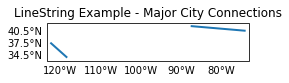

In [3]:
# Create GeoDataFrame with LineString geometries
linestring_geoms = [
    LineString([(-87.6298, 41.8781), (-74.0060, 40.7128)]),  # Chicago to New York
    LineString(
        [(-118.2437, 34.0522), (-122.4194, 37.7749)]
    ),  # Los Angeles to San Francisco
]
linestring_gdf = gpd.GeoDataFrame(geometry=linestring_geoms, crs="EPSG:4326")

# Save to temporary file
temp_dir = tempfile.mkdtemp()
linestring_file = os.path.join(temp_dir, "linestring_example.geojson")
linestring_gdf.to_file(linestring_file, driver="GeoJSON")

# Load with UXarray
ux_linestring = ux.Grid.from_file(linestring_file)
print(
    f"LineString Grid: n_face={ux_linestring.n_face}, n_node={ux_linestring.n_node}, n_edge={ux_linestring.n_edge}"
)

# Plot
ux_linestring.plot(
    title="LineString Example - Major City Connections", backend="matplotlib"
)

### MultiLineString Example

MultiLineString geometries represent multiple line segments that form a logical group, such as a river system or road network.

CRS already WGS84: EPSG:4326
MultiLineString Grid: n_face=0, n_node=8, n_edge=4


:Path   [Longitude,Latitude]
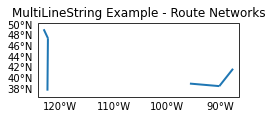

In [4]:
# Create GeoDataFrame with MultiLineString geometries
multilinestring_geoms = [
    MultiLineString(
        [
            [(-87.6298, 41.8781), (-90.1994, 38.6270)],  # Chicago to St. Louis
            [(-90.1994, 38.6270), (-95.7129, 39.0997)],  # St. Louis to Kansas City
        ]
    ),
    MultiLineString(
        [
            [(-122.4194, 37.7749), (-122.3321, 47.6062)],  # San Francisco to Seattle
            [(-122.3321, 47.6062), (-123.1207, 49.2827)],  # Seattle to Vancouver
        ]
    ),
]
multilinestring_gdf = gpd.GeoDataFrame(geometry=multilinestring_geoms, crs="EPSG:4326")

# Save to temporary file
multilinestring_file = os.path.join(temp_dir, "multilinestring_example.geojson")
multilinestring_gdf.to_file(multilinestring_file, driver="GeoJSON")

# Load with UXarray
ux_multilinestring = ux.Grid.from_file(multilinestring_file)
print(
    f"MultiLineString Grid: n_face={ux_multilinestring.n_face}, n_node={ux_multilinestring.n_node}, n_edge={ux_multilinestring.n_edge}"
)

# Plot
ux_multilinestring.plot(
    title="MultiLineString Example - Route Networks", backend="matplotlib"
)

### Point Example

Point geometries represent individual locations like cities, landmarks, or sampling points.

CRS already WGS84: EPSG:4326
Point Grid: n_face=0, n_node=3, n_edge=0


:Points   [lon,lat]
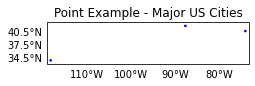

In [5]:
# Create GeoDataFrame with Point geometries
point_geoms = [
    Point(-87.6298, 41.8781),  # Chicago
    Point(-74.0060, 40.7128),  # New York
    Point(-118.2437, 34.0522),  # Los Angeles
]
point_gdf = gpd.GeoDataFrame(geometry=point_geoms, crs="EPSG:4326")

# Save to temporary file
point_file = os.path.join(temp_dir, "point_example.geojson")
point_gdf.to_file(point_file, driver="GeoJSON")

# Load with UXarray
ux_point = ux.Grid.from_file(point_file)
print(
    f"Point Grid: n_face={ux_point.n_face}, n_node={ux_point.n_node}, n_edge={ux_point.n_edge}"
)

# Plot
ux_point.plot(title="Point Example - Major US Cities", backend="matplotlib")

### MultiPoint Example

MultiPoint geometries represent groups of points that form a logical collection, such as sampling stations or city clusters.

CRS already WGS84: EPSG:4326
MultiPoint Grid: n_face=0, n_node=4, n_edge=0


:Points   [lon,lat]
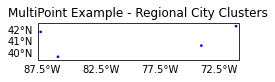

In [6]:
# Create GeoDataFrame with MultiPoint geometries
multipoint_geoms = [
    MultiPoint(
        [
            (-87.6298, 41.8781),  # Chicago
            (-86.1581, 39.7684),  # Indianapolis
        ]
    ),
    MultiPoint(
        [
            (-74.0060, 40.7128),  # New York
            (-71.0589, 42.3601),  # Boston
        ]
    ),
]
multipoint_gdf = gpd.GeoDataFrame(geometry=multipoint_geoms, crs="EPSG:4326")

# Save to temporary file
multipoint_file = os.path.join(temp_dir, "multipoint_example.geojson")
multipoint_gdf.to_file(multipoint_file, driver="GeoJSON")

# Load with UXarray
ux_multipoint = ux.Grid.from_file(multipoint_file)
print(
    f"MultiPoint Grid: n_face={ux_multipoint.n_face}, n_node={ux_multipoint.n_node}, n_edge={ux_multipoint.n_edge}"
)

# Plot
ux_multipoint.plot(
    title="MultiPoint Example - Regional City Clusters", backend="matplotlib"
)

## Load a Geojson file and plot

 * This section demonstrates how to load a Geojson file using uxarray's Grid.from_file() function
 * The Geojson file used in this example is a few buildings around downtown Chicago. The plot is shown using the "matplotlib" backend.


Skipping field nodes: unsupported OGR type: 13


CRS already WGS84: EPSG:4326
GeoJSON Grid (Buildings): n_face=10, n_node=181, n_edge=181


:Path   [Longitude,Latitude]
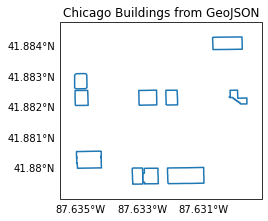

In [7]:
geojson_filename = "../../test/meshfiles/geojson/sample_chicago_buildings.geojson"
uxgeojson = ux.Grid.from_file(geojson_filename)
print(
    f"GeoJSON Grid (Buildings): n_face={uxgeojson.n_face}, n_node={uxgeojson.n_node}, n_edge={uxgeojson.n_edge}"
)
uxgeojson.plot(title="Chicago Buildings from GeoJSON", backend="matplotlib")

## Open NetCDF mesh file using the Grid.from_file() function

* Regular NetCDF files can also be opened using this function. Backend options available are:
    * xarray
    * geopandas (default for opening shapefile, geojson file and other file formats supported by geopandas read_file function)
* In the following code, we load a NetCDF mesh file: scrip/outCSne8/outCSne8.nc and print out the grid contents.

In [8]:
nc_filename = "../../test/meshfiles/scrip/outCSne8/outCSne8.nc"
uxgrid = ux.Grid.from_file(nc_filename, backend="xarray")
uxgrid

<uxarray.Grid>
Original Grid Type: Scrip
Grid Dimensions:
  * n_node: 407
  * n_face: 384
  * n_max_face_nodes: 4
Grid Coordinates (Spherical):
  * node_lon: (407,)
  * node_lat: (407,)
  * face_lon: (384,)
  * face_lat: (384,)
Grid Coordinates (Cartesian):
Grid Connectivity Variables:
  * face_node_connectivity: (384, 4)
Grid Descriptor Variables:

## Subsetting Geospatial Data (Polygon Example)

Subsetting allows you to work with a specific region of interest. This works best with polygon geometries.

In [9]:
# Load the US boundary shapefile
shp_filename = (
    "../../test/meshfiles/shp/cb_2018_us_nation_20m/cb_2018_us_nation_20m.shp"
)
uxds_full = ux.Grid.from_file(shp_filename)
print(
    f"Original Grid: n_face={uxds_full.n_face}, n_node={uxds_full.n_node}, n_edge={uxds_full.n_edge}"
)

# Define a bounding box for the continental US and subset
lat_bounds = [24.0, 50.0]  # Continental US latitude range
lon_bounds = [-125.0, -66.0]  # Continental US longitude range
uxds_subset = uxds_full.subset.bounding_box(lon_bounds, lat_bounds)
print(
    f"Subset Grid: n_face={uxds_subset.n_face}, n_node={uxds_subset.n_node}, n_edge={uxds_subset.n_edge}"
)

# Plot both - original and subset
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
uxds_full.plot(title="Original US Boundary", backend="matplotlib", ax=axes[0])
uxds_subset.plot(title="Continental US (Subset)", backend="matplotlib", ax=axes[1])
plt.tight_layout()

Transforming CRS from EPSG:4269 to EPSG:4326...
Transformed CRS: EPSG:4326
Original Grid: n_face=82, n_node=5782, n_edge=5782


Subset Grid: n_face=23, n_node=3201, n_edge=3201


## Subsetting Geospatial Data (Polygon Example)

Subsetting allows you to work with a specific region of interest. This works best with polygon geometries.

In [10]:
# Load the US boundary shapefile
shp_filename = (
    "../../test/meshfiles/shp/cb_2018_us_nation_20m/cb_2018_us_nation_20m.shp"
)
uxds_full = ux.Grid.from_file(shp_filename)
print(
    f"Original Grid: n_face={uxds_full.n_face}, n_node={uxds_full.n_node}, n_edge={uxds_full.n_edge}"
)

# Define a bounding box for the continental US and subset
lat_bounds = [24.0, 50.0]  # Continental US latitude range
lon_bounds = [-125.0, -66.0]  # Continental US longitude range
uxds_subset = uxds_full.subset.bounding_box(lon_bounds, lat_bounds)
print(
    f"Subset Grid: n_face={uxds_subset.n_face}, n_node={uxds_subset.n_node}, n_edge={uxds_subset.n_edge}"
)

# Plot both - original and subset
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
uxds_full.plot(title="Original US Boundary", backend="matplotlib", ax=axes[0])
uxds_subset.plot(title="Continental US (Subset)", backend="matplotlib", ax=axes[1])
plt.tight_layout()

Transforming CRS from EPSG:4269 to EPSG:4326...
Transformed CRS: EPSG:4326
Original Grid: n_face=82, n_node=5782, n_edge=5782


Subset Grid: n_face=23, n_node=3201, n_edge=3201


## Remapping from Shapefile

The following steps demonstrate remapping Global Relative Humidity Data onto a specific region defined by Shapefile using UXarray.

1. **Read the shapefile** (uxds)


Original CRS: None. Assigning WGS84...
Assigned CRS: EPSG:4326
Chicago Neighborhoods Grid: n_face=101, n_node=54918, n_edge=54918


<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
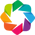

:Path   [Longitude,Latitude]

In [11]:
shp_filename = (
    "../../test/meshfiles/shp/chicago_neighborhoods/chicago_neighborhoods.shp"
)
uxds = ux.Grid.from_file(shp_filename)
print(
    f"Chicago Neighborhoods Grid: n_face={uxds.n_face}, n_node={uxds.n_node}, n_edge={uxds.n_edge}"
)
uxds.plot(
    title="Chicago Neighborhoods",
    backend="bokeh",
)


2. **Initialize Input Data Files**
   - The input datasets consist of NetCDF files that include global relative humidity data.
   - The `datafiles` variable points to two NetCDF files using the `geodf.get` function, specifying the paths:
     - The first file contains meteorological diagnostic data:  
       `netcdf_files/MPAS/FalkoJudt/dyamond_1/30km/diag.2016-08-20_00.00.00_subset.nc`.
     - The second file provides the MPAS grid specification:  
       `netcdf_files/MPAS/FalkoJudt/dyamond_1/30km/x1.655362.grid_subset.nc`.

2. **Open the Datasets with UXarray**
   - The `ux.open_dataset()` function is used to load these files, making them accessible as a UXarray Dataset.
   - `uxds_source` is the opened dataset that holds the meteorological data, such as relative humidity, structured over the MPAS grid.

In [12]:
datafiles = (
    geodf.get(
        "netcdf_files/MPAS/FalkoJudt/dyamond_1/30km/diag.2016-08-20_00.00.00_subset.nc"
    ),
    geodf.get("netcdf_files/MPAS/FalkoJudt/dyamond_1/30km/x1.655362.grid_subset.nc"),
)

uxds_source = ux.open_dataset(datafiles[1], datafiles[0])

4. **Remap Relative Humidity Data**
   - The `relhum_200hPa` variable is accessed from `uxds_source` to extract relative humidity data at 200 hPa pressure level.
   - **Inverse Distance Weighted Remapping**:
     - The data is remapped using UXarray's `inverse_distance_weighted` method.
     - The remapping is done to "face centers," adapting the data from its original grid to align with a new shape or structure.

5. **Plot the Remapped Data**
   - The remapped data for Chicago neighborhoods is plotted using UXarray's plotting utilities.
   - The plot uses the `sequential_blue` colormap and is rendered with the `bokeh` backend.
   - The title of the plot is "Chicago Neighborhoods Relative Humidity," giving a clear representation of how relative humidity varies spatially.

In [ ]:
chicago_relative_humidty = uxds_source["relhum_200hPa"].remap.inverse_distance_weighted(
    uxds, remap_to="face centers"
)

chicago_relative_humidty[0].plot(
    title="Chicago Neighborhoods Relative Humidity",
    backend="bokeh",
)

:Image   [x,y]   (x_y relhum_200hPa)